In [1]:
import pandas as pd
import numpy as np

In [2]:
data_liga = pd.read_csv('Datos/2016-2017-1eraDivision.csv')
features = ['Date', 'HomeTeam', 'AwayTeam',
            'BbAvH', 'BbAvD', 'BbAvA',
            'B365H', 'B365D', 'B365A',
            'FTHG', 'FTAG', 'FTR']
data = data_liga[features]

def expected_returns(data, h, d, a, ncol, name_column):
    new_col = data.apply(lambda x: 1/x[h] + 1/x[d] + 1/x[a], axis=1)
    data.insert(loc=ncol, column=name_column, value=new_col)
expected_returns(data, 'BbAvH', 'BbAvD', 'BbAvA', 6, 'BbAvHRet')

def predictions(data, h, d, a, rets, ncol):
    ph = data.apply(lambda x: 1/x[h]/x[rets], axis=1)
    pd = data.apply(lambda x: 1/x[d]/x[rets], axis=1)
    pa = data.apply(lambda x: 1/x[a]/x[rets], axis=1)
    data.insert(loc=ncol, column='ph', value=ph)
    data.insert(loc=ncol+1, column='pd', value=pd)
    data.insert(loc=ncol+2, column='pa', value=pa)
predictions(data, 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet', 7)
data = data.drop(['BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet'], axis=1)

new_col = data.apply(lambda x: x['Date'].split('/')[1], axis=1)
data.insert(loc=1, column='Month', value=new_col)

In [3]:
data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1617.csv')
def transform_month(data):
    # ADD 1 MONTH BECOUSE DATA IS TAKEN AT THE FINAL OF THE MONTH
    # THUS FOR ANALYSIS IN THE MATCHES OF OCTOBER I USE DATA OF SEPTEMBER
    # IN AUGUST WE DO NOT HAVE DATA OF JULY SO I WILL REPEATE AND USE THE DATA OF FINALS OF MONTH
    data.loc[data['Date'] == 8, 'Date'] = '09'
    data.loc[data['Date'] == 9, 'Date'] = '10'
    data.loc[data['Date'] == 10, 'Date'] = '11'
    data.loc[data['Date'] == 11, 'Date'] = '12'
    data.loc[data['Date'] == 12, 'Date'] = '01'
    data.loc[data['Date'] == 1, 'Date'] = '02'
    data.loc[data['Date'] == 2, 'Date'] = '03'
    data.loc[data['Date'] == 3, 'Date'] = '04'
    data.loc[data['Date'] == 4, 'Date'] = '05'
    data.loc[data['Date'] == 5, 'Date'] = '06'

def transform_team(data):
    data.loc[data['Team'] == 'FC Barcelona', 'Team'] = 'Barcelona'
    data.loc[data['Team'] == 'Atlético Madrid', 'Team'] = 'Ath Madrid'
    data.loc[data['Team'] == 'Valencia CF', 'Team'] = 'Valencia'
    data.loc[data['Team'] == 'Villarreal CF', 'Team'] = 'Villarreal'
    data.loc[data['Team'] == 'Real Betis', 'Team'] = 'Betis'
    data.loc[data['Team'] == 'Athletic Bilbao', 'Team'] = 'Ath Bilbao'
    data.loc[data['Team'] == 'Sevilla FC', 'Team'] = 'Sevilla'
    data.loc[data['Team'] == 'SD Eibar', 'Team'] = 'Eibar'
    data.loc[data['Team'] == 'Celta Vigo', 'Team'] = 'Celta'
    data.loc[data['Team'] == 'Real Sociedad', 'Team'] = 'Sociedad'
    data.loc[data['Team'] == 'Granada CF', 'Team'] = 'Granada'
    data.loc[data['Team'] == 'RCD Espanyol', 'Team'] = 'Espanol'
    data.loc[data['Team'] == 'Sporting Gijón', 'Team'] = 'Sp Gijon'
    data.loc[data['Team'] == 'CA Osasuna', 'Team'] = 'Osasuna'
    data.loc[data['Team'] == 'Deport. Alavés', 'Team'] = 'Alaves'
    data.loc[data['Team'] == 'CD Leganés', 'Team'] = 'Leganes'
    data.loc[data['Team'] == 'RC Deportivo', 'Team'] = 'La Coruna'
    data.loc[data['Team'] == 'UD Las Palmas', 'Team'] = 'Las Palmas'
    data.loc[data['Team'] == 'Málaga CF', 'Team'] = 'Malaga'
transform_month(data_fifa)
transform_team(data_fifa)

In [4]:
# data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1617.csv')
print(sorted(data_fifa['Team'].unique()))
print(sorted(data['HomeTeam'].unique()))

['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Eibar', 'Espanol', 'Granada', 'La Coruna', 'Las Palmas', 'Leganes', 'Malaga', 'Osasuna', 'Real Madrid', 'Sevilla', 'Sociedad', 'Sp Gijon', 'Valencia', 'Villarreal']
['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Eibar', 'Espanol', 'Granada', 'La Coruna', 'Las Palmas', 'Leganes', 'Malaga', 'Osasuna', 'Real Madrid', 'Sevilla', 'Sociedad', 'Sp Gijon', 'Valencia', 'Villarreal']


In [4]:
def add_team_score(data, data_scores):
    ATTH, MIDH, DEFH, ATTA, MIDA, DEFA = [], [], [], [], [], []
    for h, a, m in data[['HomeTeam', 'AwayTeam', 'Month']].values:
        if m == '08': # DATA BEGINS MID AUGUST, TAKE AUGUST IN MATCHES OF AUGUST AS WELL AS SEPTEMBER
            m = '09'
        ATTH.append(data_scores['ATT'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        MIDH.append(data_scores['MID'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        DEFH.append(data_scores['DEF'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        ATTA.append(data_scores['ATT'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        MIDA.append(data_scores['MID'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        DEFA.append(data_scores['DEF'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
    data.insert(loc=4, column='ATTH', value=ATTH)
    data.insert(loc=5, column='MIDH', value=MIDH)
    data.insert(loc=6, column='DEFH', value=DEFH)
    data.insert(loc=7, column='ATTA', value=ATTA)
    data.insert(loc=8, column='MIDA', value=MIDA)
    data.insert(loc=9, column='DEFA', value=DEFA)
add_team_score(data, data_fifa)

In [7]:
data.head()

,Date,Month,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR
0,19/08/16,08,La Coruna,Eibar,79,76,77,75,76,75,0.483920,0.288013,0.228067,1.95,3.40,4.2,2,1,H
1,19/08/16,08,Malaga,Osasuna,76,77,77,71,73,72,0.587462,0.260024,0.152514,1.62,3.75,6.0,1,1,D
2,20/08/16,08,Barcelona,Betis,92,86,83,78,77,76,0.873170,0.091515,0.035316,1.08,11.00,29.0,6,2,H
3,20/08/16,08,Granada,Villarreal,72,73,73,80,80,80,0.372944,0.302645,0.324411,2.50,3.20,3.0,1,1,D
4,20/08/16,08,Sevilla,Espanol,81,80,79,78,77,76,0.565430,0.246094,0.188477,1.67,4.00,5.0,6,4,H


# MIRO CON EL MODELO DE 2018/2019

In [5]:
from keras.models import load_model
model = load_model('zeit.h5', compile = False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Single bet

In [7]:
all_x = data.values[:, 4:13]
preds = model.predict(all_x)

In [9]:
predictions = []
for i in preds:
    if np.argmax(i) == 0:
        predictions.append('H')
    elif np.argmax(i) == 1:
        predictions.append('A')
    elif np.argmax(i) == 2:
        predictions.append('D')
    elif np.argmax(i) == 3:
        predictions.append('NO')
data['Preds'] = predictions
data.drop(['Date', 'Month'], axis=1).head()

,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR,Preds
0,La Coruna,Eibar,79,76,77,75,76,75,0.483920,0.288013,0.228067,1.95,3.40,4.2,2,1,H,A
1,Malaga,Osasuna,76,77,77,71,73,72,0.587462,0.260024,0.152514,1.62,3.75,6.0,1,1,D,A
2,Barcelona,Betis,92,86,83,78,77,76,0.873170,0.091515,0.035316,1.08,11.00,29.0,6,2,H,A
3,Granada,Villarreal,72,73,73,80,80,80,0.372944,0.302645,0.324411,2.50,3.20,3.0,1,1,D,A
4,Sevilla,Espanol,81,80,79,78,77,76,0.565430,0.246094,0.188477,1.67,4.00,5.0,6,4,H,A


In [8]:
print(len(data[data['Preds']=='A']))
print(len(data[data['Preds']=='D']))
print(len(data[data['Preds']=='H']))
print(len(data[data['Preds']=='NO']))

132
0
248
0


In [10]:
def accuracy_predictions(data, predict, house_bet_h, house_bet_a, house_bet_d):
    i = 0
    gain_journey = []
    for j in range(int(len(data)/10)):
        print('- Jornada nº{}/{}'.format(j+1,len(data)/10))
        betted = 0
        accuracy = 0
        profits = 0
        for k in range(10):
            if data[predict][i] == 'H':
                betted += 1
                if data['FTR'][i] == 'H':
                    accuracy += 1
                    profits += (data[house_bet_h][i])
            if data[predict][i] == 'A':
                betted += 1
                if data['FTR'][i] == 'A':
                    accuracy += 1
                    profits += (data[house_bet_a][i])
            if data[predict][i] == 'D':
                betted += 1
                if data['FTR'][i] == 'D':
                    accuracy += 1
                    profits += (data[house_bet_d][i])
            i+=1
        print('    Accuracy = {}/{}'.format(accuracy, betted))
        print('    Profits = {}€'.format(profits))
        print('    Win (or lost) = {}€\n'.format(profits-betted))
        gain_journey.append(profits-betted)
    return gain_journey
        
gain_journey = accuracy_predictions(data, 'Preds', 'B365H', 'B365A', 'B365D')

- Jornada nº1/38.0
    Accuracy = 3/10
    Profits = 12.5€
    Win (or lost) = 2.5€

- Jornada nº2/38.0
    Accuracy = 2/10
    Profits = 4.0€
    Win (or lost) = -6.0€

- Jornada nº3/38.0
    Accuracy = 6/10
    Profits = 49.67999999999999€
    Win (or lost) = 39.67999999999999€

- Jornada nº4/38.0
    Accuracy = 2/10
    Profits = 2.54€
    Win (or lost) = -7.46€

- Jornada nº5/38.0
    Accuracy = 3/10
    Profits = 8.05€
    Win (or lost) = -1.9499999999999993€

- Jornada nº6/38.0
    Accuracy = 3/10
    Profits = 7.119999999999999€
    Win (or lost) = -2.880000000000001€

- Jornada nº7/38.0
    Accuracy = 2/10
    Profits = 4.85€
    Win (or lost) = -5.15€

- Jornada nº8/38.0
    Accuracy = 4/10
    Profits = 10.71€
    Win (or lost) = 0.7100000000000009€

- Jornada nº9/38.0
    Accuracy = 2/10
    Profits = 4.5€
    Win (or lost) = -5.5€

- Jornada nº10/38.0
    Accuracy = 3/10
    Profits = 7.5€
    Win (or lost) = -2.5€

- Jornada nº11/38.0
    Accuracy = 2/10
    Profits = 5.02

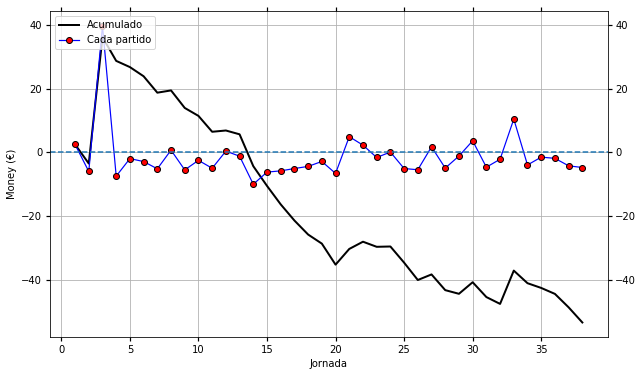

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
gain_journey = np.array(gain_journey)
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(which='both',direction='out', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=True,bottom=True,top=True,left=True,right=True)

ax.plot(range(1,int(len(data)/10)+1), [np.sum(gain_journey[:i]) for i in range(1,int(len(data)/10)+1)],
        color='k', lw=2, label='Acumulado')
ax.plot(range(1,int(len(data)/10)+1), gain_journey, marker='o', color='blue', mec='k', mfc='r', 
        linewidth=1.2, label='Cada partido')
ax.axhline(y=0, ls='--')
ax.set_xlabel('Jornada')
ax.set_ylabel('Money (€)')
ax.legend(loc=2)
plt.grid(True)

# fig.savefig('VirtualGain1617.png', bbox_inches='tight')

# Multiple betting

In [12]:
preds = model.predict(all_x)
        
data['PredH'] = preds[:, 0]
data['PredD'] = preds[:, 1]
data['PredA'] = preds[:, 2]
data['PredNO'] = preds[:, 3]

data.drop(['Date', 'Month'], axis=1).head()

,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,...,B365D,B365A,FTHG,FTAG,FTR,Preds,PredH,PredD,PredA,PredNO
0,La Coruna,Eibar,79,76,77,75,76,75,0.483920,0.288013,...,3.40,4.2,2,1,H,A,1.818820e-12,1.0,1.196449e-10,5.921656e-11
1,Malaga,Osasuna,76,77,77,71,73,72,0.587462,0.260024,...,3.75,6.0,1,1,D,A,2.346131e-12,1.0,1.622196e-10,1.125108e-10
2,Barcelona,Betis,92,86,83,78,77,76,0.873170,0.091515,...,11.00,29.0,6,2,H,A,1.309185e-12,1.0,2.239563e-10,1.568578e-10
3,Granada,Villarreal,72,73,73,80,80,80,0.372944,0.302645,...,3.20,3.0,1,1,D,A,1.349489e-12,1.0,2.687214e-10,6.018511e-11
4,Sevilla,Espanol,81,80,79,78,77,76,0.565430,0.246094,...,4.00,5.0,6,4,H,A,2.089077e-12,1.0,1.348840e-10,9.922015e-11


In [13]:
def gains_predictions(data, predict, house_bet_h, house_bet_a, house_bet_d):
    i = 0
    gain_journey = []
    for j in range(int(len(data)/10)):
        print('- Jornada nº{}/{}'.format(j+1,int(len(data)/10)))
        betted = 0
        accuracy = 0
        profits = 0
        for k in range(10):
            if data['FTR'][i] == 'H':
                profits += data['PredH'][i]*data['B365H'][i]
            if data['FTR'][i] == 'A':
                profits += data['PredA'][i]*data['B365A'][i]
            if data['FTR'][i] == 'D':
                profits += data['PredD'][i]*data['B365D'][i]
            betted += 1-data['PredNO'][i]
            i+=1
        print('    Betted = {}/{}'.format(betted, 10))
        print('    Profits = {}€'.format(profits))
        print('    Win (or lost) = {}€\n'.format(profits-betted))
        gain_journey.append(profits-betted)
    return gain_journey

gain_journey = gains_predictions(data, 'Preds', 'B365H', 'B365A', 'B365D')

- Jornada nº1/38
    Betted = 9.99999999894971/10
    Profits = 13.450000002455349€
    Win (or lost) = 3.4500000035056395€

- Jornada nº2/38
    Betted = 9.999999999251855/10
    Profits = 16.500000001075733€
    Win (or lost) = 6.500000001823878€

- Jornada nº3/38
    Betted = 9.99999999893587/10
    Profits = 3.4000000125111587€
    Win (or lost) = -6.599999986424711€

- Jornada nº4/38
    Betted = 9.999999999033705/10
    Profits = 13.150000001418315€
    Win (or lost) = 3.15000000238461€

- Jornada nº5/38
    Betted = 9.999999999152136/10
    Profits = 11.000000001649841€
    Win (or lost) = 1.0000000024977052€

- Jornada nº6/38
    Betted = 9.999999999196321/10
    Profits = 5.0000000021853825€
    Win (or lost) = -4.999999997010939€

- Jornada nº7/38
    Betted = 9.999999999131276/10
    Profits = 17.3000000008331€
    Win (or lost) = 7.300000001701825€

- Jornada nº8/38
    Betted = 9.999999998904745/10
    Profits = 6.400000002361552€
    Win (or lost) = -3.5999999965431924€



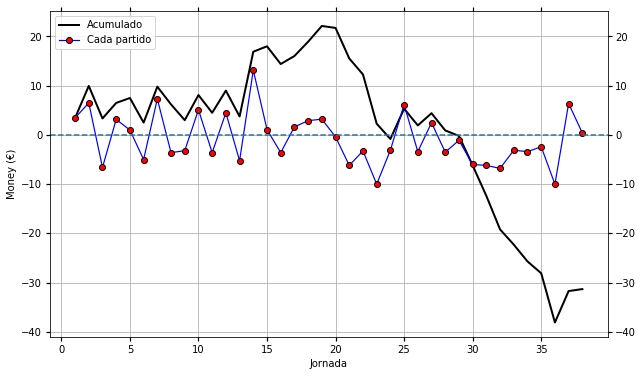

In [14]:
gain_journey = np.array(gain_journey)
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(which='both',direction='out', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=True,bottom=True,top=True,left=True,right=True)

ax.plot(range(1,int(len(data)/10)+1), [np.sum(gain_journey[:i]) for i in range(1,int(len(data)/10)+1)], 
        color='k', lw=2, label='Acumulado')
ax.plot(range(1,int(len(data)/10)+1), gain_journey, marker='o', color='blue', 
        mec='k', mfc='r', linewidth=1.2, label='Cada partido')
ax.axhline(y=0, ls='--')
ax.set_xlabel('Jornada')
ax.set_ylabel('Money (€)')
ax.legend(loc=2)
plt.grid(True)